# Stochastic Analysis

## load tables

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [103]:
agents_number_df = pd.read_csv('./agents_results.csv')
agents_number_df = agents_number_df.drop_duplicates(subset='damage')
agents_number_df = agents_number_df.loc[(agents_number_df['d'] == 5) & (agents_number_df['sigma'] == 1)]
agents_number_df = agents_number_df.groupby(['planner', 'num_agents'], as_index=False).mean()
agents_number_df.head()

,planner,num_agents,num_robots,f,d,sigma,active_time,planner_time,damage,num_disabled
0,StochasticAdditive5LackPlanner,50,5.0,2.0,5.0,1.0,172.800799,6.033328,7673.417064,38.6335
1,StochasticAdditive5LackPlanner,100,5.0,2.0,5.0,1.0,171.090335,29.689702,17932.195877,59.7600
2,StochasticAdditive5LackPlanner,200,5.0,2.0,5.0,1.0,140.000000,5.790841,38463.280000,72.3920
3,StochasticAdditive5LackPlanner,300,5.0,2.0,5.0,1.0,140.000000,11.316855,58835.320000,101.0730
4,StochasticAdditive5LackPlanner,400,5.0,2.0,5.0,1.0,140.000000,13.054559,80961.000000,117.0500


In [104]:
f_df = pd.read_csv('./f_results.csv')
f_df = f_df.drop_duplicates(subset='damage')
f_df = f_df.loc[(f_df['num_agents'] == 300)]
f_df = f_df.groupby(['planner', 'f'], as_index=False).mean()
f_df.head()

,planner,f,num_agents,num_robots,d,sigma,active_time,planner_time,damage,num_disabled
0,StochasticIterativePlanner,1.2,300.0,5.0,5.0,1.0,274.330333,0.920247,70427.460707,29.6010
1,StochasticIterativePlanner,1.3,300.0,5.0,5.0,1.0,261.857269,1.357716,67996.203832,42.3667
2,StochasticIterativePlanner,1.4,300.0,5.0,5.0,1.0,258.327398,1.810812,65828.579418,54.2816
3,StochasticIterativePlanner,1.5,300.0,5.0,5.0,1.0,247.815872,2.210782,63725.955072,65.5200
4,StochasticIterativePlanner,1.6,300.0,5.0,5.0,1.0,242.580723,2.532634,61870.297897,75.2575


In [105]:
robots_df = pd.read_csv('./robots_results.csv')
robots_df = robots_df.drop_duplicates(subset=['planner', 'damage'])
robots_df = robots_df.groupby(['planner', 'num_robots'], as_index=False).mean()
robots_df.head()

,planner,num_robots,num_agents,f,d,sigma,active_time,planner_time,damage,num_disabled
0,StochasticIterativePlanner,2,100.0,2.0,5.0,1.0,227.262299,0.344956,19905.408983,27.402667
1,StochasticIterativePlanner,3,100.0,2.0,5.0,1.0,213.475637,0.399677,18276.187929,36.862000
2,StochasticIterativePlanner,4,100.0,2.0,5.0,1.0,203.610982,0.425191,16988.500454,44.457333
3,StochasticIterativePlanner,5,100.0,2.0,5.0,1.0,198.976387,0.423328,16446.318134,45.960667
4,StochasticIterativePlanner,6,100.0,2.0,5.0,1.0,180.787283,0.419446,15969.324642,47.288333


## visualizations

In [106]:
planners_colors = {'StochasticIterativePlanner': 'red',
                   'StochasticStaticLackPlanner': 'blue',
                   'StochasticAdditiveLackPlanner': 'orange',
                   'StochasticMonotone15LackPlanner': 'green',
                   'StochasticMonotone20LackPlanner': 'purple',
                   'StochasticMonotone30LackPlanner': 'olive',
                   'StochasticMonotone45LackPlanner': 'cyan'}

In [107]:
from typing import List

def visualize(X: List[str], Y: List[str], data, file_to_save: str, title: str):
    plt.figure(figsize=(14,10))
    plt.suptitle(title, fontsize=18)

    for i in range(len(Y)):
        x, y = X[i], Y[i]

        plt.subplot(2, 2, i+1)
        plt.xlabel(x)
        plt.ylabel(y)
        for j in range(len(data)):
            r = data[j]
            plt.plot(list(r[x]), list(r[y]), c=list(planners_colors.values())[j])

        if i==1:
            plt.legend(planners_colors.keys(), fontsize='14')

    plt.savefig(file_to_save)
    plt.show()

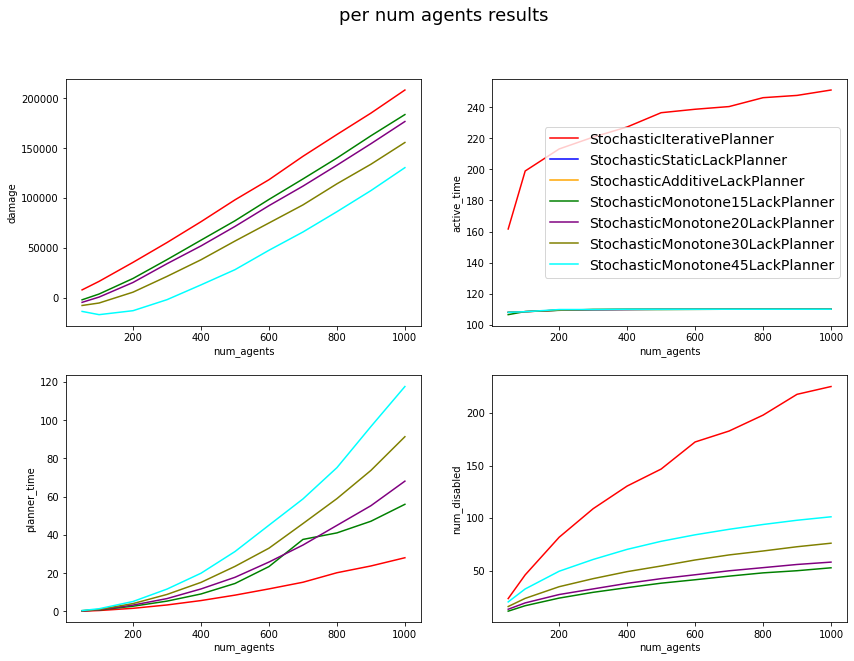

In [108]:
Y = ['damage', 'active_time', 'planner_time', 'num_disabled']
X = ['num_agents' for _ in Y]

agents_results = [agents_number_df.loc[agents_number_df['planner'] == name] for name in planners_colors.keys()]
title = 'per num agents results'
file_to_save = './plots/stochastic_num_agents.png'

visualize(X, Y, agents_results, file_to_save, title)

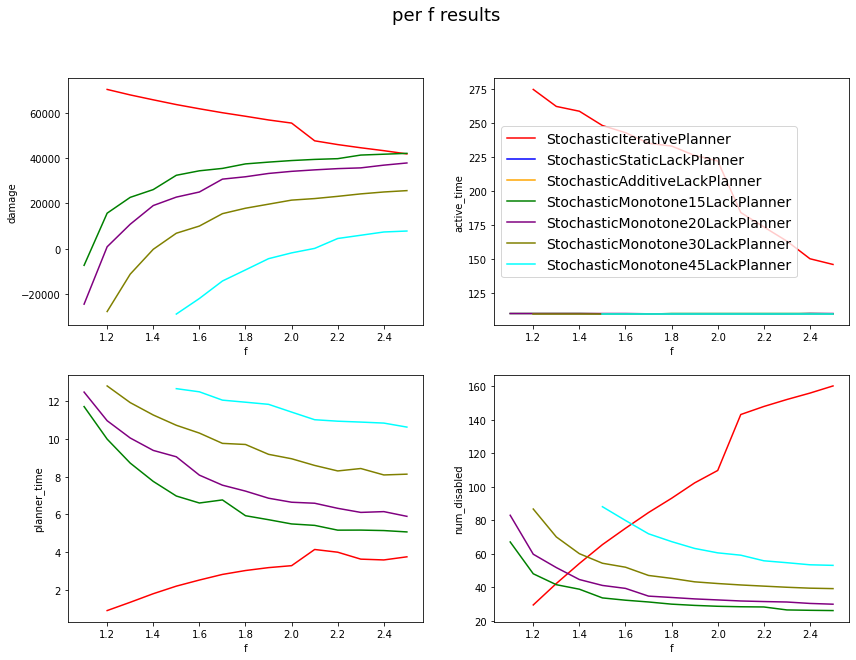

In [109]:
Y = ['damage', 'active_time', 'planner_time', 'num_disabled']
X = ['f' for _ in Y]

f_results = [f_df.loc[f_df['planner'] == name] for name in planners_colors.keys()]
title = 'per f results'
file_to_save = './plots/stochastic_f.png'

visualize(X, Y, f_results, file_to_save, title)

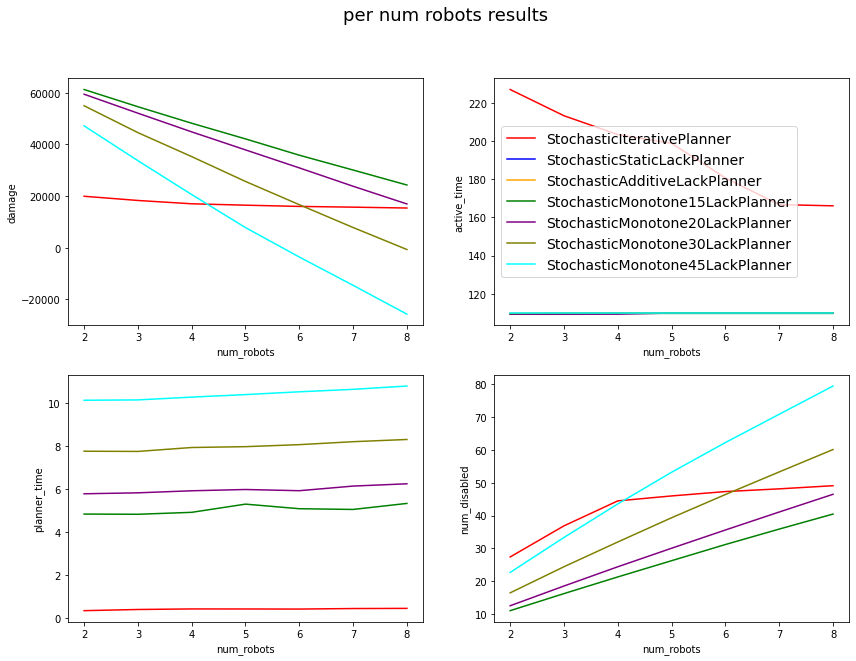

In [110]:
Y = ['damage', 'active_time', 'planner_time', 'num_disabled']
X = ['num_robots' for _ in Y]

robots_results = [robots_df.loc[robots_df['planner'] == name] for name in planners_colors.keys()]
title = 'per num robots results'
file_to_save = './plots/stochastic_num_robots.png'

visualize(X, Y, robots_results, file_to_save, title)

## run experiments

### config file

In [96]:
import json
with open('config.json') as json_file:
    config = json.load(json_file)
config

{'x_size': 100,
 'y_size_init': 100,
 'y_size': 300,
 'x_buffer': 10,
 'y_buffer': 10,
 'num_robots': 5,
 'num_agents': 100,
 'agent_speed': 1,
 'robot_speed': 2,
 'disablement_range': 5,
 'sigma': 1}

In [97]:
import math
import time
from random import seed

from planners.stochastic.baseline.stochastic_iterative_planner import StochasticIterativePlanner
from planners.stochastic.partial_blockage.stochastic_additive_lack_planner import StochasticAdditiveLackPlanner
from planners.stochastic.partial_blockage.stochastic_monotone_lack_planner import StochasticMonotoneLackPlanner
from world.agents.stochastic_agent import StochasticAgent
from world.robots.timing_robot import TimingRobot
from world.stochastic_environment import StochasticEnvironment
from planners.planner import Planner
from planners.stochastic.partial_blockage.stochastic_static_lack_planner import StochasticStaticLackPlanner
from utils.functions import *

In [98]:
def run(planner: Planner, file_name: str):
    agents = [StochasticAgent(loc=sample_point(config['x_buffer'], config['x_buffer'] + config['x_size'],
                                               config['y_buffer'], config['y_buffer'] + config['y_size_init'], True),
                              v=config['agent_speed'], sigma=config['sigma']) for _ in range(config['num_agents'])]

    robots = [BasicRobot(sample_point(0, config['x_size'] + 2 * config['x_buffer'], 0, config['y_buffer'], True),
                         config['robot_speed'], config['disablement_range']) for _ in range(config['num_robots'])]

    env = StochasticEnvironment(agents=agents, robots=robots, top_border=config['y_size'] + config['y_buffer'],
                                right_border=config['x_size'] + config['x_buffer'], left_border=config['x_buffer'])

    before = time.time()
    _, active_time, expected_damage, expected_num_disabled = planner.plan(env)
    planning_time = time.time() - before

    write_report(planner=str(planner),
                 num_agents=config['num_agents'],
                 num_robots=config['num_robots'],
                 f=config['robot_speed'] / config['agent_speed'],
                 d=config['disablement_range'],
                 active_or_copmletion_time=active_time,
                 planner_time=planning_time,
                 damage=expected_damage,
                 num_disabled=expected_num_disabled,
                 file_name=file_name,
                 is_active_time=True,
                 sigma=config['sigma'])

In [99]:
planners = [StochasticMonotoneLackPlanner()] #, StochasticStaticLackPlanner(), StochasticAdditiveLackPlanner()]

for planner in planners:
    for alpha in [math.pi / 4, math.pi / 6, math.pi / 9, math.pi / 12]:
        planner.alpha = alpha
        for v in tqdm([50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]):
            print(f'*** *** v={v} *** ***')
            for s in range(5):
                seed(s)

                config['num_agents'] = v
                print(f'running {str(planner)} with seed {s}..')
                run(planner, 'agents_results.csv')

  0%|          | 0/11 [00:00<?, ?it/s]

*** *** v=50 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


  9%|▉         | 1/11 [00:02<00:22,  2.22s/it]

*** *** v=100 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


 18%|█▊        | 2/11 [00:09<00:44,  4.99s/it]

*** *** v=200 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


 27%|██▋       | 3/11 [00:35<01:56, 14.52s/it]

*** *** v=300 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


 36%|███▋      | 4/11 [01:33<03:42, 31.82s/it]

*** *** v=400 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


 45%|████▌     | 5/11 [03:13<05:37, 56.33s/it]

*** *** v=500 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


 55%|█████▍    | 6/11 [05:49<07:31, 90.37s/it]

*** *** v=600 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


 64%|██████▎   | 7/11 [09:34<08:57, 134.50s/it]

*** *** v=700 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


 73%|███████▎  | 8/11 [14:28<09:15, 185.25s/it]

*** *** v=800 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


 82%|████████▏ | 9/11 [20:44<08:09, 244.82s/it]

*** *** v=900 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


 91%|█████████ | 10/11 [28:47<05:18, 318.42s/it]

*** *** v=1000 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


  0%|          | 0/11 [00:00<?, ?it/s]

*** *** v=50 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


  9%|▉         | 1/11 [00:01<00:17,  1.80s/it]

*** *** v=100 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 18%|█▊        | 2/11 [00:06<00:33,  3.71s/it]

*** *** v=200 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 27%|██▋       | 3/11 [00:27<01:30, 11.33s/it]

*** *** v=300 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 36%|███▋      | 4/11 [01:11<02:50, 24.37s/it]

*** *** v=400 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 45%|████▌     | 5/11 [02:27<04:17, 42.93s/it]

*** *** v=500 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 55%|█████▍    | 6/11 [04:25<05:41, 68.34s/it]

*** *** v=600 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 64%|██████▎   | 7/11 [07:10<06:40, 100.02s/it]

*** *** v=700 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 73%|███████▎  | 8/11 [10:59<07:03, 141.26s/it]

*** *** v=800 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 82%|████████▏ | 9/11 [15:54<06:18, 189.26s/it]

*** *** v=900 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 91%|█████████ | 10/11 [22:03<04:04, 244.61s/it]

*** *** v=1000 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


  0%|          | 0/11 [00:00<?, ?it/s]

*** *** v=50 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


  9%|▉         | 1/11 [00:01<00:11,  1.19s/it]

*** *** v=100 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 18%|█▊        | 2/11 [00:05<00:26,  2.97s/it]

*** *** v=200 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 27%|██▋       | 3/11 [00:21<01:13,  9.15s/it]

*** *** v=300 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 36%|███▋      | 4/11 [00:55<02:11, 18.77s/it]

*** *** v=400 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 45%|████▌     | 5/11 [01:54<03:18, 33.16s/it]

*** *** v=500 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 55%|█████▍    | 6/11 [03:23<04:21, 52.20s/it]

*** *** v=600 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 64%|██████▎   | 7/11 [05:32<05:09, 77.31s/it]

*** *** v=700 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 73%|███████▎  | 8/11 [08:25<05:23, 107.91s/it]

*** *** v=800 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 82%|████████▏ | 9/11 [12:10<04:48, 144.46s/it]

*** *** v=900 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 91%|█████████ | 10/11 [16:46<03:05, 185.15s/it]

*** *** v=1000 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


  0%|          | 0/11 [00:00<?, ?it/s]

*** *** v=50 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..


  9%|▉         | 1/11 [00:01<00:12,  1.28s/it]

running StochasticMonotone15LackPlanner with seed 4..
*** *** v=100 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 18%|█▊        | 2/11 [00:04<00:24,  2.68s/it]

*** *** v=200 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 27%|██▋       | 3/11 [00:18<00:59,  7.49s/it]

*** *** v=300 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 36%|███▋      | 4/11 [00:46<01:49, 15.61s/it]

*** *** v=400 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 45%|████▌     | 5/11 [01:35<02:46, 27.74s/it]

*** *** v=500 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 55%|█████▍    | 6/11 [02:48<03:36, 43.30s/it]

*** *** v=600 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 64%|██████▎   | 7/11 [04:37<04:18, 64.63s/it]

*** *** v=700 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 73%|███████▎  | 8/11 [07:00<04:28, 89.60s/it]

*** *** v=800 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 82%|████████▏ | 9/11 [10:05<03:58, 119.38s/it]

*** *** v=900 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 91%|█████████ | 10/11 [14:00<02:35, 155.06s/it]

*** *** v=1000 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


100%|██████████| 11/11 [18:40<00:00, 101.85s/it]


In [100]:
# planners = [StochasticMonotoneLackPlanner(), StochasticIterativePlanner(), StochasticStaticLackPlanner(),
#             StochasticAdditiveLackPlanner()]
planners = [StochasticMonotoneLackPlanner()]

config['num_agents'] = 300

for planner in planners:
    for alpha in [math.pi / 3, math.pi / 4, math.pi / 6, math.pi / 9, math.pi / 12]:
        planner.alpha = alpha
        for v in tqdm([1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5]):
            print(f'*** *** v={v} *** ***')
            for s in range(5):
                seed(s)

                config['robot_speed'] = v
                print(f'running {str(planner)} with seed {s}..')
                try:
                    run(planner, 'f_results.csv')
                except:
                    pass

  0%|          | 0/15 [00:00<?, ?it/s]

*** *** v=1.1 *** ***
running StochasticMonotone60LackPlanner with seed 0..
running StochasticMonotone60LackPlanner with seed 1..
running StochasticMonotone60LackPlanner with seed 2..
running StochasticMonotone60LackPlanner with seed 3..
running StochasticMonotone60LackPlanner with seed 4..
*** *** v=1.2 *** ***
running StochasticMonotone60LackPlanner with seed 0..
running StochasticMonotone60LackPlanner with seed 1..
running StochasticMonotone60LackPlanner with seed 2..
running StochasticMonotone60LackPlanner with seed 3..
running StochasticMonotone60LackPlanner with seed 4..
*** *** v=1.3 *** ***
running StochasticMonotone60LackPlanner with seed 0..
running StochasticMonotone60LackPlanner with seed 1..
running StochasticMonotone60LackPlanner with seed 2..
running StochasticMonotone60LackPlanner with seed 3..
running StochasticMonotone60LackPlanner with seed 4..
*** *** v=1.4 *** ***
running StochasticMonotone60LackPlanner with seed 0..
running StochasticMonotone60LackPlanner with see

 67%|██████▋   | 10/15 [01:02<00:31,  6.24s/it]

*** *** v=2.1 *** ***
running StochasticMonotone60LackPlanner with seed 0..
running StochasticMonotone60LackPlanner with seed 1..
running StochasticMonotone60LackPlanner with seed 2..
running StochasticMonotone60LackPlanner with seed 3..
running StochasticMonotone60LackPlanner with seed 4..


 73%|███████▎  | 11/15 [02:06<00:53, 13.50s/it]

*** *** v=2.2 *** ***
running StochasticMonotone60LackPlanner with seed 0..
running StochasticMonotone60LackPlanner with seed 1..
running StochasticMonotone60LackPlanner with seed 2..
running StochasticMonotone60LackPlanner with seed 3..
running StochasticMonotone60LackPlanner with seed 4..


 80%|████████  | 12/15 [03:10<01:03, 21.16s/it]

*** *** v=2.3 *** ***
running StochasticMonotone60LackPlanner with seed 0..
running StochasticMonotone60LackPlanner with seed 1..
running StochasticMonotone60LackPlanner with seed 2..
running StochasticMonotone60LackPlanner with seed 3..
running StochasticMonotone60LackPlanner with seed 4..


 87%|████████▋ | 13/15 [04:14<00:57, 28.69s/it]

*** *** v=2.4 *** ***
running StochasticMonotone60LackPlanner with seed 0..
running StochasticMonotone60LackPlanner with seed 1..
running StochasticMonotone60LackPlanner with seed 2..
running StochasticMonotone60LackPlanner with seed 3..
running StochasticMonotone60LackPlanner with seed 4..


 93%|█████████▎| 14/15 [05:16<00:35, 35.47s/it]

*** *** v=2.5 *** ***
running StochasticMonotone60LackPlanner with seed 0..
running StochasticMonotone60LackPlanner with seed 1..
running StochasticMonotone60LackPlanner with seed 2..
running StochasticMonotone60LackPlanner with seed 3..
running StochasticMonotone60LackPlanner with seed 4..


  0%|          | 0/15 [00:00<?, ?it/s]

*** *** v=1.1 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..
*** *** v=1.2 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..
*** *** v=1.3 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..
*** *** v=1.4 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with see

 33%|███▎      | 5/15 [01:03<02:06, 12.66s/it]

*** *** v=1.6 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


 40%|████      | 6/15 [02:05<03:33, 23.72s/it]

*** *** v=1.7 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


 47%|████▋     | 7/15 [03:05<04:20, 32.52s/it]

*** *** v=1.8 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


 53%|█████▎    | 8/15 [04:05<04:36, 39.47s/it]

*** *** v=1.9 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


 60%|██████    | 9/15 [05:04<04:28, 44.73s/it]

*** *** v=2 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


 67%|██████▋   | 10/15 [06:01<04:00, 48.14s/it]

*** *** v=2.1 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


 73%|███████▎  | 11/15 [06:56<03:20, 50.10s/it]

*** *** v=2.2 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


 80%|████████  | 12/15 [07:51<02:34, 51.41s/it]

*** *** v=2.3 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


 87%|████████▋ | 13/15 [08:45<01:44, 52.30s/it]

*** *** v=2.4 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


 93%|█████████▎| 14/15 [09:40<00:52, 52.84s/it]

*** *** v=2.5 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


  0%|          | 0/15 [00:00<?, ?it/s]

*** *** v=1.1 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..
*** *** v=1.2 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 13%|█▎        | 2/15 [01:03<06:55, 31.99s/it]

*** *** v=1.3 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 20%|██        | 3/15 [02:03<08:41, 43.49s/it]

*** *** v=1.4 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 27%|██▋       | 4/15 [02:59<08:50, 48.27s/it]

*** *** v=1.5 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 33%|███▎      | 5/15 [03:53<08:21, 50.11s/it]

*** *** v=1.6 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 40%|████      | 6/15 [04:44<07:35, 50.58s/it]

*** *** v=1.7 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 47%|████▋     | 7/15 [05:33<06:40, 50.00s/it]

*** *** v=1.8 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 53%|█████▎    | 8/15 [06:22<05:46, 49.54s/it]

*** *** v=1.9 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 60%|██████    | 9/15 [07:08<04:50, 48.41s/it]

*** *** v=2 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 67%|██████▋   | 10/15 [07:52<03:56, 47.28s/it]

*** *** v=2.1 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 73%|███████▎  | 11/15 [08:35<03:03, 45.96s/it]

*** *** v=2.2 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 80%|████████  | 12/15 [09:17<02:13, 44.61s/it]

*** *** v=2.3 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 87%|████████▋ | 13/15 [09:59<01:27, 43.87s/it]

*** *** v=2.4 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 93%|█████████▎| 14/15 [10:39<00:42, 42.84s/it]

*** *** v=2.5 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


  0%|          | 0/15 [00:00<?, ?it/s]

*** *** v=1.1 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


  7%|▋         | 1/15 [01:02<14:32, 62.32s/it]

*** *** v=1.2 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 13%|█▎        | 2/15 [01:57<12:32, 57.88s/it]

*** *** v=1.3 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 20%|██        | 3/15 [02:47<10:52, 54.39s/it]

*** *** v=1.4 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 27%|██▋       | 4/15 [03:34<09:26, 51.46s/it]

*** *** v=1.5 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 33%|███▎      | 5/15 [04:19<08:12, 49.22s/it]

*** *** v=1.6 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 40%|████      | 6/15 [04:59<06:55, 46.22s/it]

*** *** v=1.7 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 47%|████▋     | 7/15 [05:37<05:47, 43.46s/it]

*** *** v=1.8 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 53%|█████▎    | 8/15 [06:13<04:48, 41.15s/it]

*** *** v=1.9 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 60%|██████    | 9/15 [06:48<03:54, 39.01s/it]

*** *** v=2 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 67%|██████▋   | 10/15 [07:21<03:06, 37.23s/it]

*** *** v=2.1 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 73%|███████▎  | 11/15 [07:54<02:23, 35.92s/it]

*** *** v=2.2 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 80%|████████  | 12/15 [08:26<01:43, 34.62s/it]

*** *** v=2.3 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 87%|████████▋ | 13/15 [08:56<01:06, 33.39s/it]

*** *** v=2.4 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 93%|█████████▎| 14/15 [09:27<00:32, 32.59s/it]

*** *** v=2.5 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


  0%|          | 0/15 [00:00<?, ?it/s]

*** *** v=1.1 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


  7%|▋         | 1/15 [00:58<13:39, 58.54s/it]

*** *** v=1.2 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 13%|█▎        | 2/15 [01:48<11:35, 53.48s/it]

*** *** v=1.3 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 20%|██        | 3/15 [02:32<09:47, 48.95s/it]

*** *** v=1.4 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 27%|██▋       | 4/15 [03:10<08:14, 44.92s/it]

*** *** v=1.5 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 33%|███▎      | 5/15 [03:45<06:52, 41.29s/it]

*** *** v=1.6 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 40%|████      | 6/15 [04:18<05:46, 38.49s/it]

*** *** v=1.7 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 47%|████▋     | 7/15 [04:52<04:55, 36.98s/it]

*** *** v=1.8 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 53%|█████▎    | 8/15 [05:22<04:02, 34.67s/it]

*** *** v=1.9 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 60%|██████    | 9/15 [05:50<03:16, 32.79s/it]

*** *** v=2 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 67%|██████▋   | 10/15 [06:18<02:35, 31.16s/it]

*** *** v=2.1 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 73%|███████▎  | 11/15 [06:45<01:59, 29.93s/it]

*** *** v=2.2 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 80%|████████  | 12/15 [07:11<01:26, 28.70s/it]

*** *** v=2.3 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 87%|████████▋ | 13/15 [07:37<00:55, 27.85s/it]

*** *** v=2.4 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 93%|█████████▎| 14/15 [08:03<00:27, 27.22s/it]

*** *** v=2.5 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


100%|██████████| 15/15 [08:28<00:00, 33.90s/it]


In [101]:
planners = [StochasticMonotoneLackPlanner()]

for planner in planners:
    for alpha in [math.pi / 4, math.pi / 6, math.pi / 9, math.pi / 12]:
        planner.alpha = alpha

        for v in tqdm([2, 3, 4, 5, 6, 7, 8]):
            print(f'*** *** v={v} *** ***')
            for s in range(5):
                seed(s)

                config['num_robots'] = v
                print(f'running {str(planner)} with seed {s}..')
                run(planner, 'robots_results.csv')

  0%|          | 0/7 [00:00<?, ?it/s]

*** *** v=2 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


 14%|█▍        | 1/7 [00:50<05:04, 50.71s/it]

*** *** v=3 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


 29%|██▊       | 2/7 [01:41<04:13, 50.77s/it]

*** *** v=4 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


 43%|████▎     | 3/7 [02:32<03:24, 51.08s/it]

*** *** v=5 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


 57%|█████▋    | 4/7 [03:25<02:34, 51.47s/it]

*** *** v=6 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


 71%|███████▏  | 5/7 [04:17<01:43, 51.91s/it]

*** *** v=7 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


 86%|████████▌ | 6/7 [05:10<00:52, 52.37s/it]

*** *** v=8 *** ***
running StochasticMonotone45LackPlanner with seed 0..
running StochasticMonotone45LackPlanner with seed 1..
running StochasticMonotone45LackPlanner with seed 2..
running StochasticMonotone45LackPlanner with seed 3..
running StochasticMonotone45LackPlanner with seed 4..


  0%|          | 0/7 [00:00<?, ?it/s]

*** *** v=2 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 14%|█▍        | 1/7 [00:38<03:53, 38.84s/it]

*** *** v=3 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 29%|██▊       | 2/7 [01:17<03:14, 38.82s/it]

*** *** v=4 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 43%|████▎     | 3/7 [01:57<02:36, 39.24s/it]

*** *** v=5 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 57%|█████▋    | 4/7 [02:37<01:58, 39.53s/it]

*** *** v=6 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 71%|███████▏  | 5/7 [03:17<01:19, 39.84s/it]

*** *** v=7 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


 86%|████████▌ | 6/7 [03:58<00:40, 40.26s/it]

*** *** v=8 *** ***
running StochasticMonotone30LackPlanner with seed 0..
running StochasticMonotone30LackPlanner with seed 1..
running StochasticMonotone30LackPlanner with seed 2..
running StochasticMonotone30LackPlanner with seed 3..
running StochasticMonotone30LackPlanner with seed 4..


  0%|          | 0/7 [00:00<?, ?it/s]

*** *** v=2 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 14%|█▍        | 1/7 [00:28<02:53, 28.96s/it]

*** *** v=3 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 29%|██▊       | 2/7 [00:58<02:25, 29.09s/it]

*** *** v=4 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 43%|████▎     | 3/7 [01:27<01:57, 29.34s/it]

*** *** v=5 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 57%|█████▋    | 4/7 [01:57<01:28, 29.57s/it]

*** *** v=6 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 71%|███████▏  | 5/7 [02:27<00:59, 29.61s/it]

*** *** v=7 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 86%|████████▌ | 6/7 [02:58<00:29, 30.00s/it]

*** *** v=8 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


  0%|          | 0/7 [00:00<?, ?it/s]

*** *** v=2 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 14%|█▍        | 1/7 [00:24<02:25, 24.23s/it]

*** *** v=3 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 29%|██▊       | 2/7 [00:48<02:01, 24.22s/it]

*** *** v=4 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 43%|████▎     | 3/7 [01:13<01:37, 24.41s/it]

*** *** v=5 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 57%|█████▋    | 4/7 [01:39<01:15, 25.24s/it]

*** *** v=6 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 71%|███████▏  | 5/7 [02:05<00:50, 25.32s/it]

*** *** v=7 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


 86%|████████▌ | 6/7 [02:30<00:25, 25.31s/it]

*** *** v=8 *** ***
running StochasticMonotone15LackPlanner with seed 0..
running StochasticMonotone15LackPlanner with seed 1..
running StochasticMonotone15LackPlanner with seed 2..
running StochasticMonotone15LackPlanner with seed 3..
running StochasticMonotone15LackPlanner with seed 4..


100%|██████████| 7/7 [02:57<00:00, 25.30s/it]
